In [31]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,jaccard_score,log_loss
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")

In [3]:
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
my_data.shape

(200, 6)

In [6]:
my_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [10]:
label_encoder = LabelEncoder()
for col in my_data.columns:
    if my_data[col].dtype == 'object':
        my_data[col] = label_encoder.fit_transform(my_data[col])


In [11]:
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [19]:
X = my_data.drop("Drug",axis=1)
y = my_data["Drug"]

In [14]:
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=818,test_size=0.2)

In [15]:
model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

[Text(0.625, 0.9, 'x[4] <= 14.829\nentropy = 1.985\nsamples = 160\nvalue = [19, 15, 12, 41, 73]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 1.822\nsamples = 87\nvalue = [19, 15, 12, 41, 0]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\nentropy = 0.99\nsamples = 34\nvalue = [19, 15, 0, 0, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\nentropy = 0.772\nsamples = 53\nvalue = [0, 0, 12, 41, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 24\nvalue = [0, 0, 12, 12, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 0, 29, 0]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 73\nvalue = [0, 0, 0, 0, 73]')]

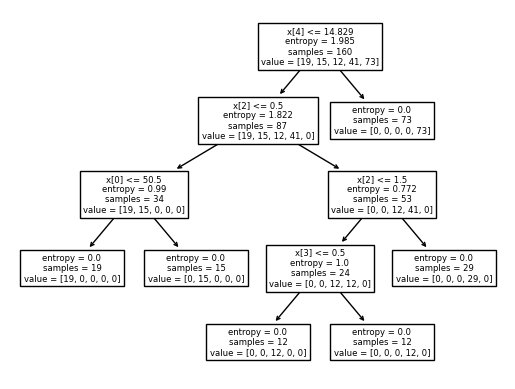

In [33]:
plot_tree(model)